# CLARKE ERROR GRID ANALYSIS - Exemple Notebook

## Credits

### Contributors: 
This Notebook was created by [David Gerard](https://github.com/David-GERARD). 

The python source code was originally created by [Trevor Tsue](https://github.com/suetAndTie), and eddited by [David Gerard](https://github.com/David-GERARD).

This work is based on the Matlab Clarke Error Grid Analysis File Version 1.2 by: Edgar Guevara Codina codina@REMOVETHIScactus.iico.uaslp.mx March 29 2013, Copyright (c) 2008, Edgar Guevara Codina All rights reserved.

### References: 
* [1] Clarke, WL. (2005). "The Original Clarke Error Grid Analysis (EGA)." Diabetes Technology and Therapeutics 7(5), pp. 776-779. 
* [2] Maran, A. et al. (2002). "Continuous Subcutaneous Glucose Monitoring in Diabetic Patients" Diabetes Care, 25(2). 
* [3] Kovatchev, B.P. et al. (2004). "Evaluating the Accuracy of Continuous Glucose- Monitoring Sensors" Diabetes Care, 27(8). 
* [4] Guevara, E. and Gonzalez, F. J. (2008). Prediction of Glucose Concentration by Impedance Phase Measurements, in MEDICAL PHYSICS: Tenth Mexican Symposium on Medical Physics, Mexico City, Mexico, vol. 1032, pp. 259261. 
* [5] Guevara, E. and Gonzalez, F. J. (2010). Joint optical-electrical technique for noninvasive glucose monitoring, REVISTA MEXICANA DE FISICA, vol. 56, no. 5, pp. 430434.





## Context

The Clarke Error Grid shows the differences between a blood glucose predictive measurement and a reference measurement, and it shows the clinical significance of the differences between these values.
The x-axis corresponds to the reference value and the y-axis corresponds to the prediction.
The diagonal line shows the prediction value is the exact same as the reference value.
This grid is split into five zones:

* **Zone A: Clinically Accurate**
    This zone holds the values that differ from the reference values no more than 20 percent
    or the values in the hypoglycemic range (<70 mg/dl).
    According to the literature, values in zone A are considered clinically accurate.
    These values would lead to clinically correct treatment decisions.

* **Zone B: Clinically Acceptable**
    This zone holds values that differe more than 20 percent but would lead to
    benign or no treatment based on assumptions.

* **Zone C: Overcorrecting**
    This zone leads to overcorrecting acceptable BG levels.

* **Zone D: Failure to Detect**
    This zone leads to failure to detect and treat errors in BG levels.
    The actual BG levels are outside of the acceptable levels while the predictions
    lie within the acceptable range

* **Zone E: Erroneous treatment**
    This zone leads to erroneous treatment because prediction values are opposite to
    actual BG levels, and treatment would be opposite to what is recommended.

## Example code

### Import librairies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ClarkeErrorGrid import plot_clarke_error_grid,configure_plot_parameters,calculate_clarke_error_zones

### Create synthetic data

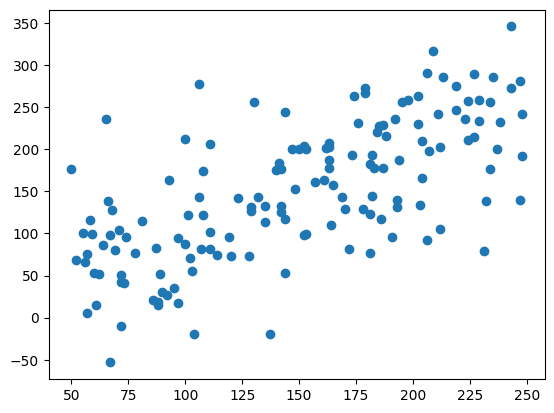

In [2]:
X = np.random.randint(50,250,150)
Y = X + np.random.normal(0,6,150)*10

plt.scatter(X,Y)

### Plot Clarke Error Grids

#### Auto-format using default parameters

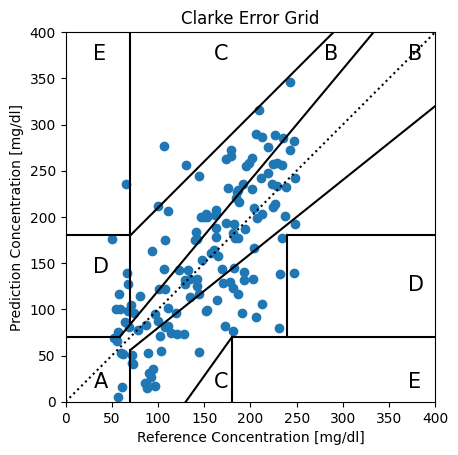

In [3]:
fig,ax = plt.subplots(1)
plot_clarke_error_grid()
ax.scatter(X,Y)

plt.show()

#### Custom format with `configure_plot_parameters`


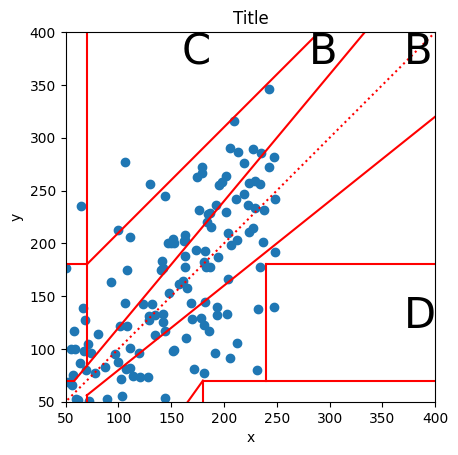

In [4]:
fig,ax = plt.subplots(1)

params = configure_plot_parameters(
    title="Title", 
    xlabel="x",
    ylabel="y",
    xlim=(50,400),
    ylim=(50,400),
    font_size = 30,
    grid_color = 'red'
    )

plot_clarke_error_grid(plot_params= params)
ax.scatter(X,Y)

plt.show()

#### Use `format = False` for maximal flexibility using `matplotlib.axes`

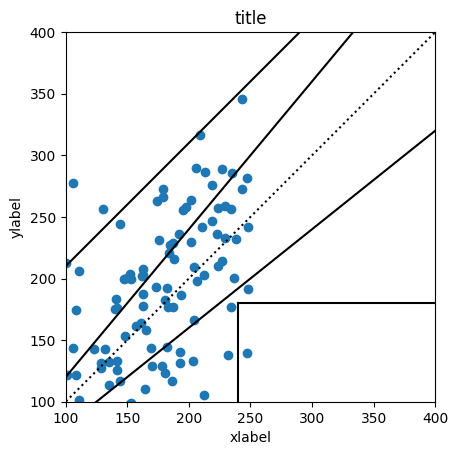

In [5]:
fig,ax = plt.subplots(1)

plot_clarke_error_grid(format = False, ax = ax)
ax.scatter(X,Y)

ax.set_title('title')
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')
ax.set_xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
ax.set_facecolor('white')

#Set axes lengths
ax.set_xlim((100,400))
ax.set_ylim((100,400))
ax.set_aspect((400)/(400))

plt.show()

### Grid error analysis with `calculate_clarke_error_zones`

Assess the number of samples in each zones (A,B,C,D,E) of the error grid.

#### Counts

In [6]:
calculate_clarke_error_zones(X,Y)

Input Warning: the minimum reference value 50 or the minimum prediction value -53.23017652802909 is less than 0 mg/dl.


array([58., 77.,  4., 10.,  1.])

#### Proportions

In [7]:
calculate_clarke_error_zones(X,Y, proportion=True)

Input Warning: the minimum reference value 50 or the minimum prediction value -53.23017652802909 is less than 0 mg/dl.


array([39., 51.,  3.,  7.,  1.])